In [105]:
import pandas as pd
import numpy as np
import matplotlib

In [106]:
pedals = pd.read_csv(r'C:\Users\roast\Desktop\reddit_guitarpedals_1000.csv')

In [107]:
pedals.columns

Index(['subreddit', 'title', 'selftext', 'upvote_ratio', 'ups', 'downs',
       'score', 'num_comments', 'created_utc', 'id', 'kind', 'url',
       'thumbnail'],
      dtype='object')

In [108]:
pedals.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,num_comments,created_utc,id,kind,url,thumbnail
0,guitarpedals,This is how it looks like seconds before runni...,NaN,0.98,2422,0,2422,242,02/25/2022 12:05:32,t18wvy,t3,https://i.redd.it/d8dzi9jtg0k81.jpg,https://b.thumbs.redditmedia.com/yKuntllpMdK6y...
1,guitarpedals,Fuck zodiac signs. What's you favourite pedal ...,NaN,0.99,1548,0,1548,380,10/04/2021 21:41:07,q1kkfh,t3,https://i.redd.it/9bnshbgidjr71.jpg,https://b.thumbs.redditmedia.com/2dpv7kkldRTIn...
2,guitarpedals,Thanks for the hookup Sweetwater,NaN,0.98,1518,0,1518,87,01/16/2022 11:06:18,s5ewxh,t3,https://i.redd.it/frcml2jsp2c81.jpg,https://a.thumbs.redditmedia.com/IzvhIo_5NWc08...
3,guitarpedals,My sister-in-law made me an awesome pedal pillow.,NaN,1.00,1505,0,1505,62,07/08/2021 10:28:37,og8c5s,t3,https://i.redd.it/2h3bgvkc10a71.jpg,https://b.thumbs.redditmedia.com/BL1uzP7RVySJh...
4,guitarpedals,NPD. Homemade Rat with 6 band EQ in place of t...,NaN,1.00,1360,0,1360,113,10/31/2021 13:15:33,qju2hx,t3,https://i.imgur.com/nhy2bTR.jpg,https://b.thumbs.redditmedia.com/wVBX_oq1B6-x7...


In [109]:
#Changing dtypes of all columns
pedals['created_utc'] = pd.to_datetime(pedals['created_utc'])
pedals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   subreddit     1000 non-null   object        
 1   title         1000 non-null   object        
 2   selftext      45 non-null     object        
 3   upvote_ratio  1000 non-null   float64       
 4   ups           1000 non-null   int64         
 5   downs         1000 non-null   int64         
 6   score         1000 non-null   int64         
 7   num_comments  1000 non-null   int64         
 8   created_utc   1000 non-null   datetime64[ns]
 9   id            1000 non-null   object        
 10  kind          1000 non-null   object        
 11  url           1000 non-null   object        
 12  thumbnail     1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 101.7+ KB


In [41]:
# {word: frequency}
# Removing punctuation
# Removing symbols
# all lower case

word_freq = {}

for i in range(5):
    one_title_list = pedals['title'][i].lower().split()
    print(full_title(one_title_list))


['thanks', 'for', 'the', 'hookup', 'sweetwater', 'this', 'is', 'how', 'it', 'looks', 'like', 'seconds', 'before', 'running', 'to', 'a', 'bomb', 'shelter', 'fuck', 'putin', 'and', 'the', 'aggressor', 'against', 'ukraine']
['thanks', 'for', 'the', 'hookup', 'sweetwater', 'this', 'is', 'how', 'it', 'looks', 'like', 'seconds', 'before', 'running', 'to', 'a', 'bomb', 'shelter', 'fuck', 'putin', 'and', 'the', 'aggressor', 'against', 'ukraine', 'fuck', 'zodiac', 'signs', "what's", 'you', 'favourite', 'pedal', 'knob', 'and', 'why']
['thanks', 'for', 'the', 'hookup', 'sweetwater', 'this', 'is', 'how', 'it', 'looks', 'like', 'seconds', 'before', 'running', 'to', 'a', 'bomb', 'shelter', 'fuck', 'putin', 'and', 'the', 'aggressor', 'against', 'ukraine', 'fuck', 'zodiac', 'signs', "what's", 'you', 'favourite', 'pedal', 'knob', 'and', 'why', 'thanks', 'for', 'the', 'hookup', 'sweetwater']
['thanks', 'for', 'the', 'hookup', 'sweetwater', 'this', 'is', 'how', 'it', 'looks', 'like', 'seconds', 'before',

In [110]:
# Removing punctuations from every title
import string
pedals_titles = []
for i in range(len(pedals['title'])):
    words = pedals['title'][i].lower().split()

    words = [''.join(letter for letter in word if letter not in string.punctuation) for word in words]
    pedals_titles.append(words)

In [120]:
# {word: frequency}
# Removing punctuation
# Removing symbols
# all lower case

word_freq_title = {}

for title in range(len(pedals_titles)):
    for word in pedals_titles[title]:
        if word not in word_freq_title:
            word_freq_title[word] = 0
        word_freq_title[word] += 1

In [123]:
#First 10 k:v in dict
dict(list(word_freq_title.items())[0: 10])

{'this': 103,
 'is': 99,
 'how': 18,
 'it': 87,
 'looks': 2,
 'like': 29,
 'seconds': 1,
 'before': 8,
 'running': 2,
 'to': 146}

In [159]:
#Removing stop word
stop_words = ['a','an','and','are','as','be','by','by',	'for','from','has','he','in','is','it','its',
	'of','on','that','the',	'to','was',	'were','will','with','have','am', 'my', 'i', 'this', 'you', 'what', 'but']

title_dict = {}
for k, v in word_freq_title.items():
    if k not in stop_words:
        title_dict[k] = v
title_dict.pop('')

114

In [176]:
#Sorting descending to get most frequently used words in titles of posts. 
kv = ((value, key) for (key,value) in title_dict.items())
sorted_title = sorted(kv, reverse=True)
sorted_title[0:10]

[(193, 'board'),
 (182, 'npd'),
 (133, 'pedal'),
 (104, 'pedalboard'),
 (98, 'pedals'),
 (85, 'new'),
 (73, 'boss'),
 (63, 'first'),
 (41, 'one'),
 (41, 'finally')]

### Pandas

In [163]:
#Pandas dataframe and analysis
#First, title analysis. Which pedals/brands were mentioned the most? 
titles_df = pd.DataFrame(sorted_title)

In [174]:
columns_titles = ["Word","Frequency"]
titles_df = titles_df.reindex(columns=columns_titles)
titles_df.head()

,Word,Frequency
0,board,193
1,npd,182
2,pedal,133
3,pedalboard,104
4,pedals,98


<AxesSubplot:xlabel='Word'>

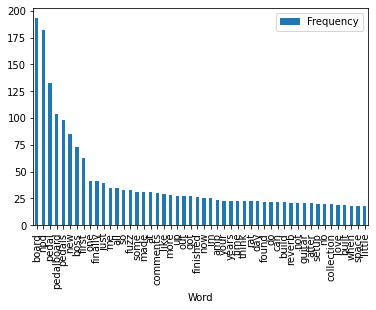

In [200]:
#Top 50 words mentioned
title_50 = titles_df.iloc[0:50]
title_50.plot(x = 'Word', y = 'Frequency', kind='bar')

In [213]:
titles_df.to_csv(r'C:\Users\roast\Desktop\gp_title_freq.csv', index=False)

### Pandas - Brand Mention Frequncy
Top guitar pedal brands:

BOSS,
Strymon,
Electro Harmonix (Electro-Harmonix, EHX),
TC Electronic,
Walrus Audio (Walrus),
Eventide,
DigiTech,
Zoom,
Earthquaker,
Dunlop,
Fender,
MXR, Catalinbread,
Donner, SubZero,
Keeley, Behringer, Fulltone, Joyo, Mooer, Universal Audio, Pro Co Sound


Klon Centaur - Most talked about

In [225]:
pedal_brands = ['BOSS', 'Strymon', 'Electro', 'Harmonix', 'Electro-Harmonix', 'EHX', 'TC Electronic', 
'Walrus Audio', 'Walrus','Eventide','DigiTech','Zoom','Earthquaker','Dunlop',
'Fender','MXR', 'Catalinbread','Donner', 'SubZero','Keeley', 'Behringer', 'Fulltone', 
'Joyo', 'Mooer', 'Universal' 'Audio', 'rat']

#lower case
for i in range(len(pedal_brands)):
   pedal_brands[i] = pedal_brands[i].lower()

In [227]:
print(pedal_brands)

['boss', 'strymon', 'electro', 'harmonix', 'electro-harmonix', 'ehx', 'tc electronic', 'walrus audio', 'walrus', 'eventide', 'digitech', 'zoom', 'earthquaker', 'dunlop', 'fender', 'mxr', 'catalinbread', 'donner', 'subzero', 'keeley', 'behringer', 'fulltone', 'joyo', 'mooer', 'universalaudio', 'rat']
